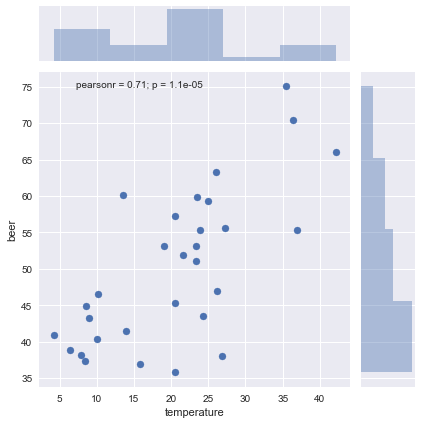

In [3]:

import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 3

%matplotlib inline

beer = pd.read_csv("5-1-1-beer.csv")

sns.jointplot(x="temperature", y="beer", data=beer)


   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny
         beer
weather      
cloudy      7
rainy       3
sunny      11


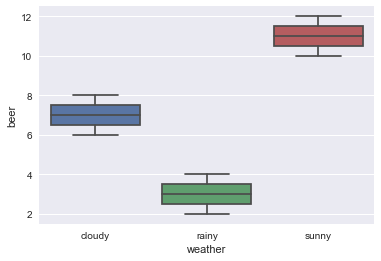

In [8]:

weather = [
    "cloudy", "cloudy",
    "rainy", "rainy",
    "sunny", "sunny"
]

beer = [6,8,2,4,10,12]

weather_beer = pd.DataFrame({
    "beer"    : beer,
    "weather" : weather
})

print(weather_beer)

sns.boxplot(x="weather", y="beer", data=weather_beer)

print(weather_beer.groupby("weather").mean())


In [13]:

effect = [7,7,3,3,11,11]

mu_effect = sp.mean(effect)
squares_model = sp.sum((effect - mu_effect) ** 2)

resid = weather_beer.beer - effect

squares_resid = sp.sum(resid ** 2)
squares_resid

6

In [18]:

df_model = 2 # 群間変動の自由度
df_resid = 3 # 郡内変動の自由度

variance_model = squares_model / df_model

variance_resid = squares_resid / df_resid

f_ratio = variance_model / variance_resid

1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model, dfd=df_resid)


0.025

In [20]:

anova_model = smf.ols("beer ~ weather", data=weather_beer).fit()

print(sm.stats.anova_lm(anova_model, type=2))

           df  sum_sq  mean_sq     F    PR(>F)
weather   2.0    64.0     32.0  16.0  0.025095
Residual  3.0     6.0      2.0   NaN       NaN


C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [21]:

anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [22]:

fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [23]:

anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [26]:

beer = pd.read_csv("5-1-1-beer.csv")

lm_model = smf.ols(formula="beer ~ temperature", data=beer).fit()

print(sm.stats.anova_lm(lm_model, type=2))

lm_model.summary()

               df       sum_sq      mean_sq          F    PR(>F)
temperature   1.0  1651.532489  1651.532489  28.446984  0.000011
Residual     28.0  1625.582178    58.056506        NaN       NaN


C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sat, 26 May 2018   Prob (F-statistic):           1.11e-05
Time:                        12:05:01   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""


### type 2 anova

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy
3      39.7    290  195.5         23.0   rainy
4      24.7    290  214.4         14.5   rainy


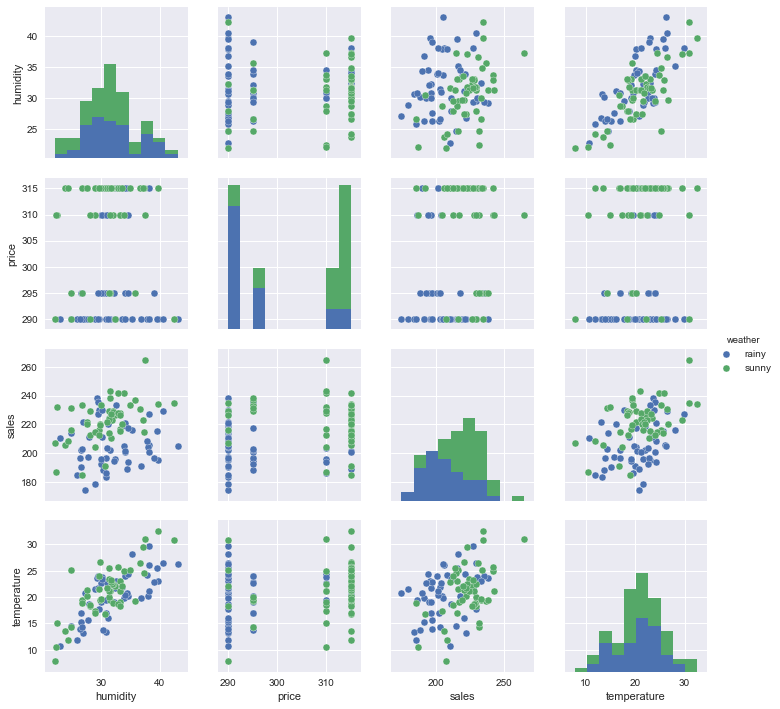

In [39]:

sales = pd.read_csv("5-3-1-lm-model.csv")
print(sales.head())

sns.pairplot(data=sales, hue="weather")


### ols()
https://qiita.com/TomokIshii/items/c0f6c20658ea7f1170f2

Intercept    34.130634
price        -0.008733
dtype: float64
            df       sum_sq    mean_sq         F    PR(>F)
price      1.0     0.962777   0.962777  0.045941  0.830729
Residual  98.0  2053.775123  20.956889       NaN       NaN


C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\blk30\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


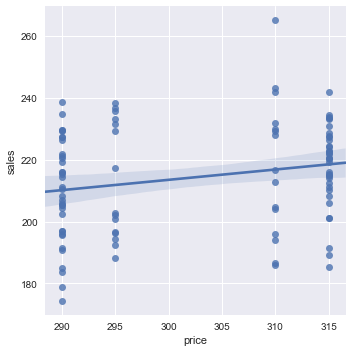

In [59]:

lm_dame = smf.ols("humidity~price", sales).fit()

print(lm_dame.params)

print(sm.stats.anova_lm(lm_dame, type=2))

sns.lmplot(x="price", y="sales", data=sales)